In [4]:
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

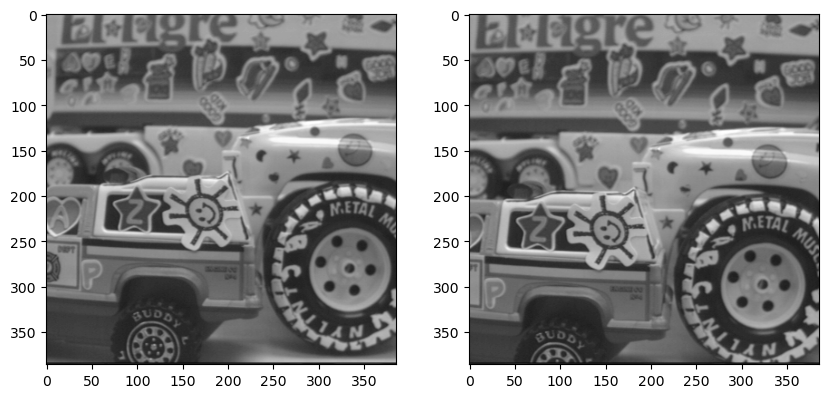

In [29]:
ta = cv2.imread('trucka.bmp', cv2.IMREAD_GRAYSCALE).astype("float")
tb = cv2.imread('truckb.bmp', cv2.IMREAD_GRAYSCALE).astype("float")
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(ta, cmap='gray')
plt.subplot(2,2,2)
plt.imshow(tb, cmap='gray')
plt.show()

In [122]:
block = [9,11,15,21,121]
search_range = 50
# img_size = 386

In [123]:
def get_patches(img, block_width, block_height, step):
    patch_list=[]
    patch_pixel=[]
    for i in range (0, img.shape[0]-block_width, step):
        for j in range (0, img.shape[1]-block_height, step):
            # patch_pixel saves the top-left pixel of the patch
            # patch saves the pixels info of every pixel
            
            patch_pixel.append((i, j))
            patch = img[i:i+block_width,j:j+block_height]
            patch_list.append(patch)

    return patch_list, patch_pixel

def get_motion(patch_list_a,patch_pixel_a,patch_list_b,patch_pixel_b,search_range):
    motions=[]
    # patch a is reference, show motion in patch of b 
    # Traversal search all patches of a, if distance<=search range then do futher calculations
    # Remember the pixel in a which has the smallest differnece
    for patch_a, pixel_a in zip(patch_list_a, pixel_tup_a):
        min_diff = float("inf")
        for patch_b, pixel_b in zip(patch_list_b,patch_pixel_b):
            distance = math.sqrt((pixel_a[0]-pixel_b[0])**2+(pixel_a[1]-pixel_b[1])**2)
            if distance<=search_range:
                diff = np.sum(abs(patch_a-patch_b))
                if diff<min_diff:
                    min_diff = diff
                    match_position = pixel_b
        dx, dy = match_position[0]-pixel_a[0], match_position[1]-pixel_a[1]
        motions.append((pixel_a, match_position,dx, dy))
    return motions

In [124]:
patch_list_a, pixel_tup_a = get_patches(ta, block[4], block[4], block[4]) 
patch_list_b, pixel_tup_b = get_patches(tb, block[4], block[4], 1)
motions = get_motion(patch_list_a,pixel_tup_a,patch_list_b,pixel_tup_b,search_range)

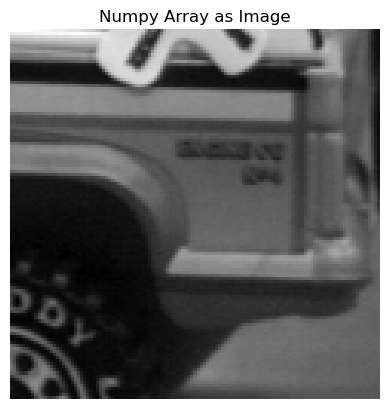

242
121


In [126]:
plt.imshow(patch_list_a[7], cmap='gray')
plt.title('Numpy Array as Image')
plt.axis('off')
plt.show()
print(pixel_tup_a[7][0])
print(pixel_tup_a[7][1])

121
242


Text(0.5, 1.0, 'motion vector for 121x121 block')

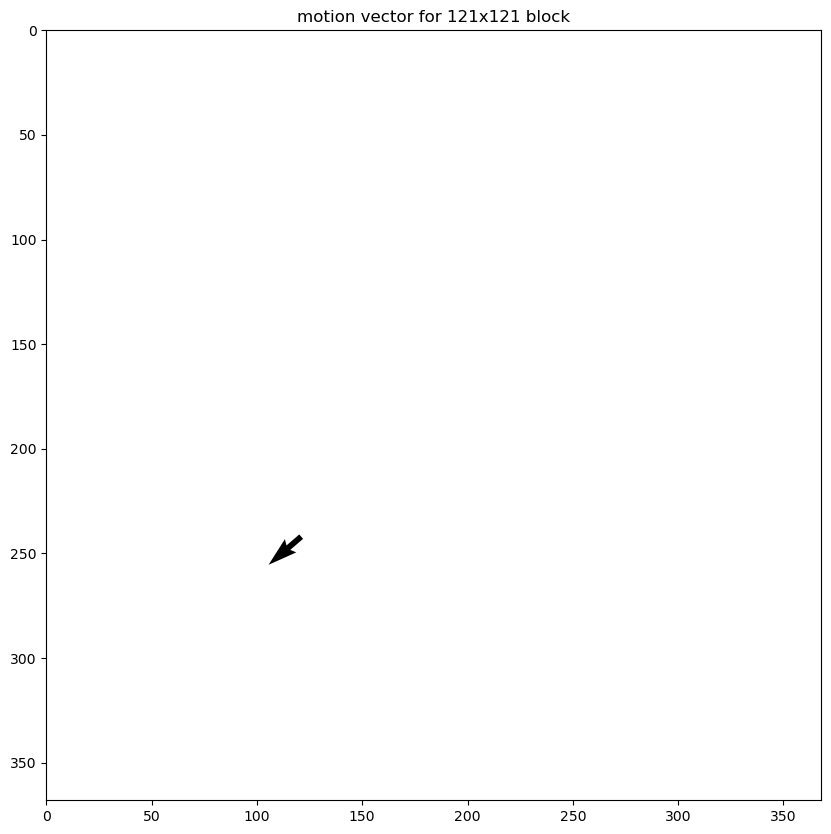

In [130]:
# X, Y define the arrow locations, U, V define the arrow directions, and C optionally sets the color
m = motions[7]
X = m[0][1]
Y = m[0][0]
U = m[3] 
V = -m[2]
print(X)
print(Y)
plt.figure(figsize=(10,10))
plt.quiver(X, Y, V, U,)
plt.axis([0, 368, 0, 368])
plt.gca().invert_yaxis()
plt.title("motion vector for {}x{} block".format(block[4],block[4]))

In [132]:
blocks = [9,11,15,21,31]
search_range = 50

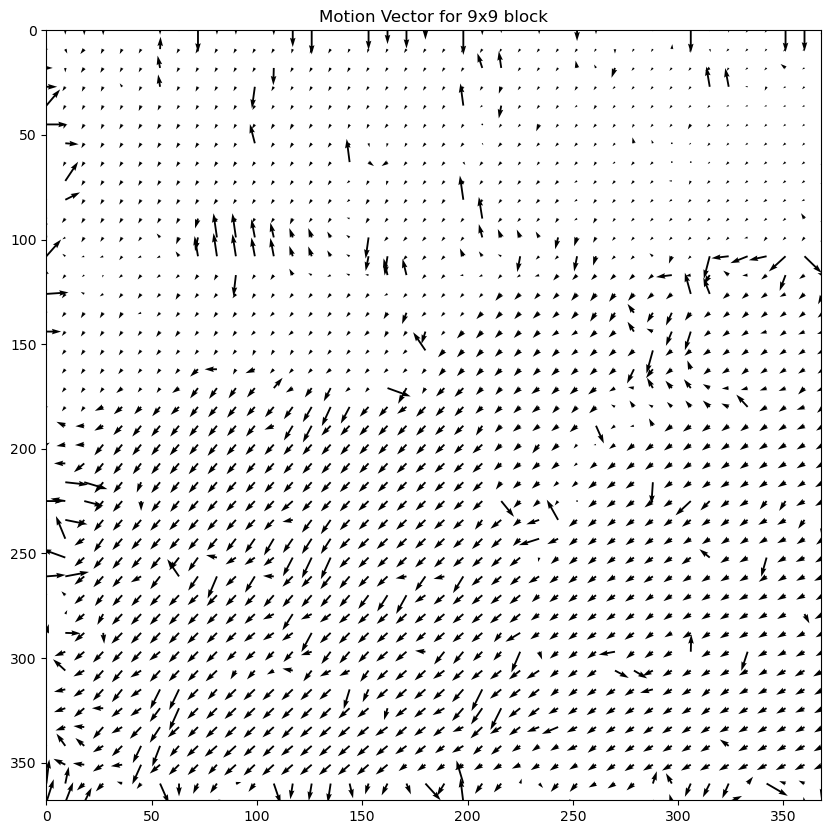

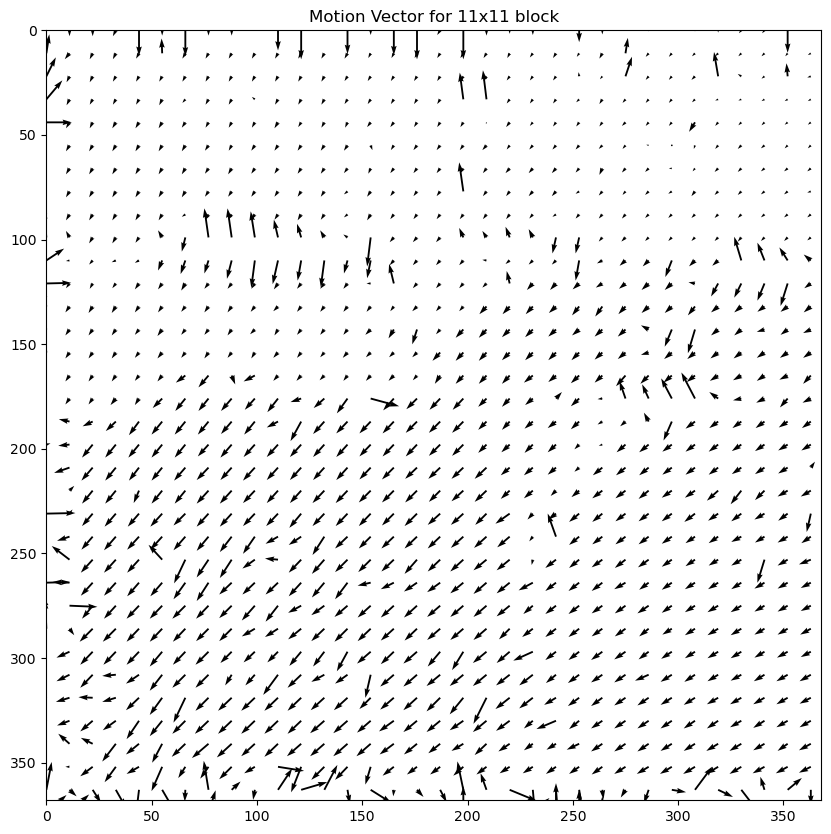

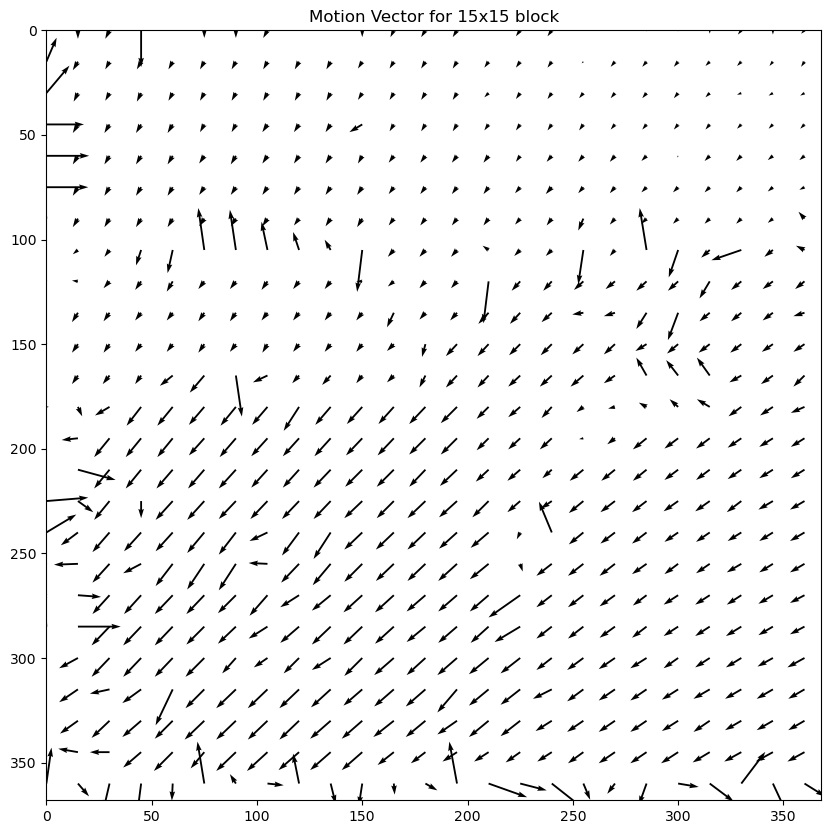

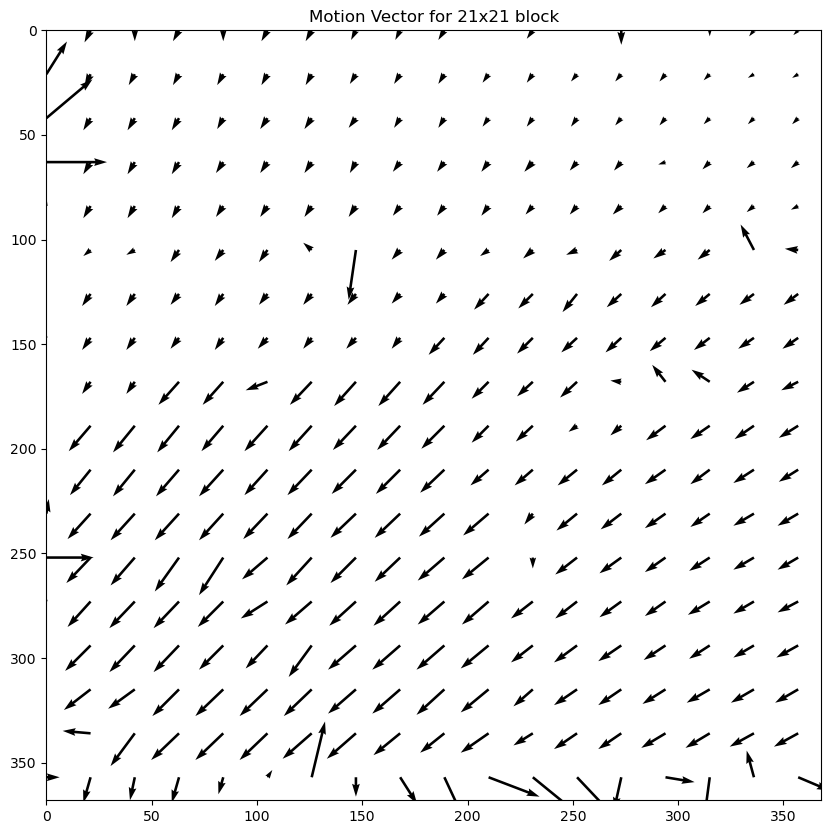

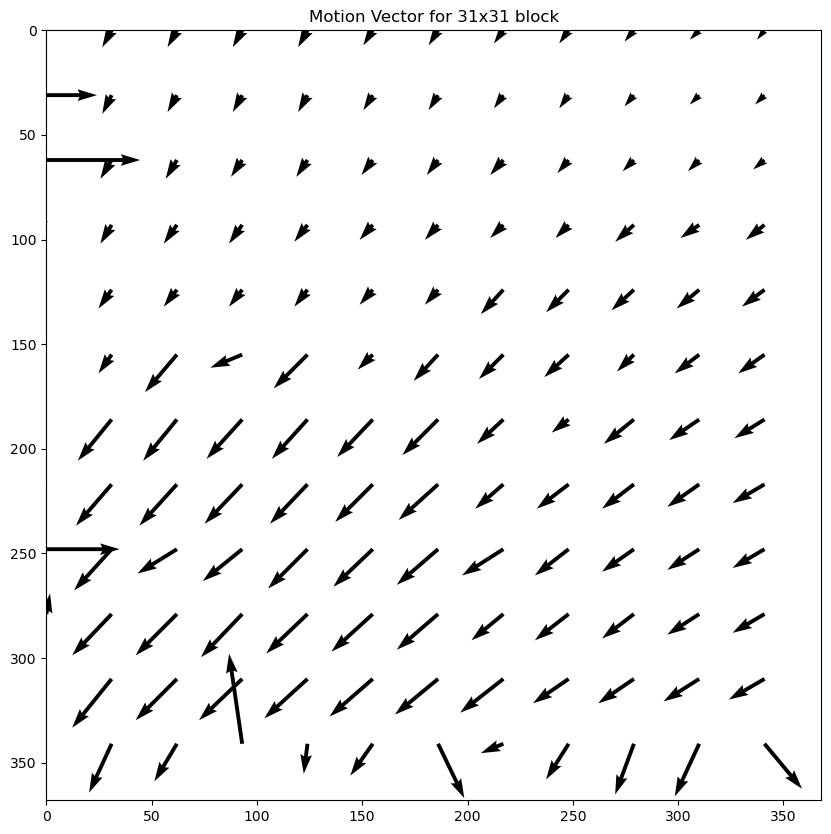

In [134]:
for block in blocks:
    patch_list_a, pixel_tup_a = get_patches(ta, block, block, block) 
    patch_list_b, pixel_tup_b = get_patches(tb, block, block, 1)
    motions = get_motion(patch_list_a,pixel_tup_a,patch_list_b,pixel_tup_b,search_range)
    # X, Y define the arrow locations, U, V define the arrow directions, and C optionally sets the color
    X = [m[0][1] for m in motions]
    Y = [m[0][0] for m in motions]
    U = [m[3] for m in motions]
    V = [-m[2] for m in motions]
    
    plt.figure(figsize=(10,10))
    plt.quiver(X, Y, V, U,)
    plt.axis([0, 368, 0, 368])
    plt.gca().invert_yaxis()
    plt.title("Motion Vector for {}x{} block".format(block,block))
    plt.savefig("./output/block_{}_motion_vector.png".format(str(block)),  transparent=False)
    plt.show()